<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/Autoregressive_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, Adam

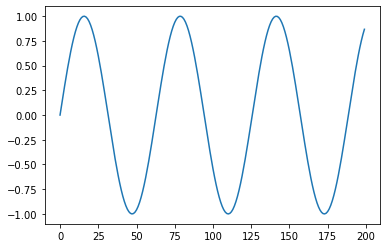

In [4]:
# synthesize data
series = np.sin(0.1*np.arange(200))

# plot the data
plt.plot(series)
plt.show()

In [5]:
# build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [6]:
# build autoregressor linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse',
              optimizer=Adam(lr=0.1))

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 44ms/step - loss: 0.9709 - val_loss: 0.4468
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.5959 - val_loss: 0.4028
Epoch 3/80
3/3 [==============================] - 0s 8ms/step - loss: 0.2355 - val_loss: 0.1250
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1684 - val_loss: 0.1528
Epoch 5/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1484 - val_loss: 0.0146
Epoch 6/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0216 - val_loss: 0.0630
Epoch 7/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0754 - val_loss: 0.0316
Epoch 8/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0228 - val_loss: 0.0399
Epoch 9/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0445 - val_loss: 0.0698
Epoch 10/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0375 - val_loss: 0.0177
Epoch 11/80
3/3 [====================

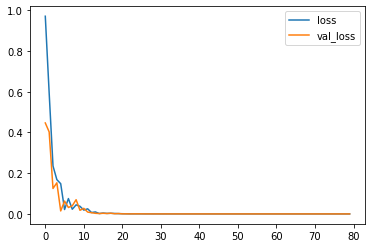

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [8]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

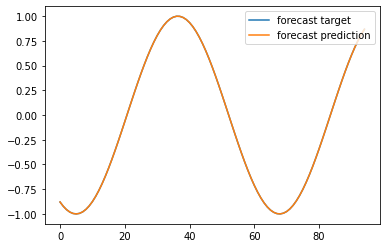

In [9]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()